In [1]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# exercise 1

df = pd.read_csv('foxes.csv', sep = '[;]', header = 1, engine = 'python')
df.rename({'"group"': 'group','"avgfood"': 'avgfood', '"groupsize"': 'groupsize', '"area"': 'area', '"weight"': 'weight'}, axis = 1, inplace = True)
df.head()

,group,avgfood,groupsize,area,weight
0,1,0.37,2,1.09,5.02
1,1,0.37,2,1.09,2.84
2,2,0.53,2,2.05,5.33
3,2,0.53,2,2.05,6.07
4,3,0.49,2,2.12,5.85


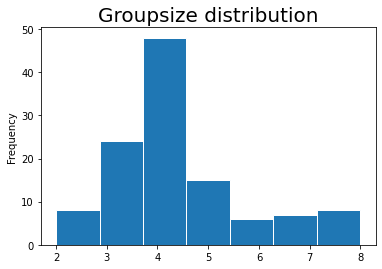

In [3]:
# exercise 2

df['groupsize'].plot.hist(bins = 7, edgecolor = 'white')
plt.title('Groupsize distribution', fontsize = 20)
plt.show()

Text(0, 0.5, 'Groupsize')

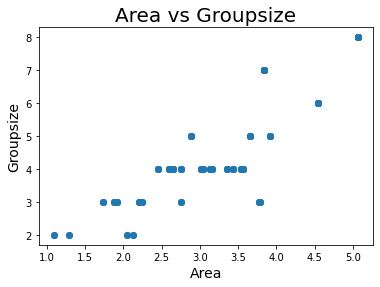

In [4]:
# exercise 3

x = df['area']
y = df['groupsize']

plt.scatter(x,y, marker='o')
plt.title('Area vs Groupsize', fontsize = 20)
plt.xlabel('Area', fontsize = 14)
plt.ylabel('Groupsize', fontsize = 14)

In [5]:
# exercise 4

def standardize(var: list)-> list:
    
    mean = np.mean(var)
    std = np.std(var)
    stand = []
    for i in var:
        stand.append((i - mean)/std)
    return stand

In [6]:
var = [2,-3,1]
print(standardize(var))
var1 = [1, -1, 0]
standardize(var1)

[0.9258200997725514, -1.3887301496588271, 0.4629100498862757]


[1.224744871391589, -1.224744871391589, 0.0]

In [7]:
# exercise 5

def pearson(x:list, y:list)-> float:
    
    assert len(x) == len(y)
    
    stand_x = standardize(x)
    stand_y = standardize(y)
    
    prod = []
    
    for i, j in zip(stand_x, stand_y):
        prod.append(i * j)
        R_xy = np.mean(prod)
        
    if (R_xy - np.corrcoef(x, y)[0,1]) < 1e-6: 
        return R_xy
    
    

In [8]:
pearson([1,-1,0], [2,-3,1])

0.9449111825230679

In [9]:
# exercise 6

std_area_list = standardize(df['area'].values.tolist())
std_groupsize_list = standardize(df['groupsize'].values.tolist())

df['standard area'] = pd.DataFrame(std_area_list)
df['standard groupsize'] = pd.DataFrame(std_groupsize_list)
df.head()

,group,avgfood,groupsize,area,weight,standard area,standard groupsize
0,1,0.37,2,1.09,5.02,-2.249313,-1.530701
1,1,0.37,2,1.09,2.84,-2.249313,-1.530701
2,2,0.53,2,2.05,5.33,-1.210738,-1.530701
3,2,0.53,2,2.05,6.07,-1.210738,-1.530701
4,3,0.49,2,2.12,5.85,-1.135008,-1.530701


In [10]:
df['groupsize'].std()

1.5385111282516362

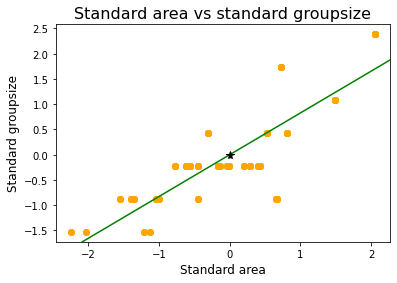

In [11]:
#exercise 7

h = df['standard area']
k = df['standard groupsize']

R_ag = pearson(df['standard area'].values.tolist(), df['standard groupsize'].values.tolist())

plt.scatter(h,k, marker='o', color = 'orange')
plt.axline((0, 0), slope=R_ag, color='green')
plt.title('Standard area vs standard groupsize', fontsize = 16)
plt.plot(0,0, marker='*', markersize=8, color = 'black')
plt.xlabel('Standard area', fontsize = 12)
plt.ylabel('Standard groupsize', fontsize = 12)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\chiar\.virtualenvs\pyqb-20220208-F1Y8T0ip\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chiar\.virtualenvs\pyqb-20220208-F1Y8T0ip\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\chiar\.virtualenvs\pyqb-20220208-F1Y8T0ip\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 97 seconds.


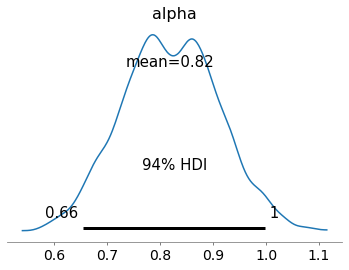

In [15]:
with pm.Model() as mymodel:
    
    alpha = pm.Normal('alpha', mu = 0)
    groupsize = pm.Normal('groupsize', mu = alpha*df['standard area'], observed = df['standard groupsize'])
    actual = pm.sample(return_inferencedata=True)
    
_ = pm.plot_posterior(actual)    